# ИССЛЕДОВАНИЕ РЫНКА ИГР

## #импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## #импорт данных

Прочитаем файл *games.csv* и сохраним его в переменной `games`:

In [2]:
games = pd.read_csv('/datasets/games.csv')

## #знакомство с данными

Получим первые 10 строк таблицы и общую информацию о таблице:

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего в таблице 11 столбцов c типом данных float и object. 

В столбцах таблицы содержится следующая информация:
+ `Name` - название игры
+ `Platform` - платформа
+ `Year_of_Release` - год выпуска
+ `Genre` - жанр игры
+ `NA_sales` - продажи в Северной Америке (миллионы долларов)
+ `EU_sales` - продажи в Европе (миллионы долларов)
+ `JP_sales` - продажи в Японии (миллионы долларов)
+ `Other_sales` - продажи в других странах (миллионы долларов)
+ `Critic_Score` - оценка критиков (максимум 100)
+ `User_Score` - оценка пользователей (максимум 10)
+ `Rating` -  рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Вывод

Каждая строка таблицы содержит информацию о названии видео игры, платформе, на которой она используется, годе ее выпуска и ее жанре, данные о продажах в Северной Америке, Европе, Японии и других странах, оценки критиков и пользователей и рейтенг от организации ESRB.

Выявленные проблемы: названия столбцов имеют разный реестр, в некоторых столбцах имеются пропуски, а так же неверный тип данных. 

## #предобработка данных

Получим перечень названия столбцов:

In [5]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Переименуем столбцы, чтобы все названия были в нижнем регистре, `Year_of_Release` заменем на `release_year`, `Rating` заменем на `rating_ESRB`, названия регионов оставим в верхнем регистре,   :

In [6]:
games.columns = ['name', 'platform', 'release_year', 'genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating_ESRB']

Оценим количество пропусков в таблице:

In [7]:
games.isnull().sum()

name               2
platform           0
release_year     269
genre              2
NA_sales           0
EU_sales           0
JP_sales           0
other_sales        0
critic_score    8578
user_score      6701
rating_ESRB     6766
dtype: int64

В 2х строках отсутсвует данные о названии игры, у 269 игр пропущены данные о годе релиза (1,6%), у 8578 игр пропущена оценка от критиков (51,3%), у 6701 игры пропущена оценка пользователей (40,1%) и у 6766 игр отсуствует рейтинг ESRB (40,5%).

Перед началом удаления пропусков проверим дынные на наличие дубликатов:

In [8]:
games.duplicated().sum()

0

Дубликатов нет.

Пройдемся по каждому столбцу, уберем пропуски и проверим на наличие ошибок в данных.

#### Столбец `name`

В 2 строках пропущено имя видео игры, посмотрим на них:

In [9]:
games[games['name'].isnull()]

,name,platform,release_year,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating_ESRB
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти игры были выпущены в 1993 году на одной и той же консоли Genesis, причем игра с индексом 14244 была выпущена в Японии, а с индексом 659 в США, судя по продажам. 

Так как игры давольно старые и не умеют рейтинга, давайте удалим их.

In [10]:
games.dropna(subset=['name'], inplace=True)

In [11]:
games['name'].isnull().sum() #проверим

0

Осмотрим имена игра в столбце:

In [12]:
games['name'].duplicated().sum()

5154

In [13]:
games['name'].value_counts().sort_values(ascending=False).head(5)

Need for Speed: Most Wanted    12
FIFA 14                         9
Madden NFL 07                   9
LEGO Marvel Super Heroes        9
Ratatouille                     9
Name: name, dtype: int64

Видно, что некоторые названия повторияются, давайте посмотрим 2 самые часто повторяющиемя игры:

In [14]:
games.query('name == "Need for Speed: Most Wanted"')

,name,platform,release_year,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating_ESRB
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [15]:
games.query('name == "Ratatouille"')

,name,platform,release_year,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating_ESRB
1598,Ratatouille,DS,2007.0,Action,0.49,0.62,0.0,0.14,NaN,NaN,NaN
2442,Ratatouille,PS2,2007.0,Action,0.31,0.00,0.0,0.53,65.0,8,E
3069,Ratatouille,PSP,2007.0,Action,0.22,0.27,0.0,0.16,64.0,7.1,E
3902,Ratatouille,PS3,2007.0,Action,0.09,0.32,0.0,0.10,55.0,4.8,E
3948,Ratatouille,Wii,2007.0,Action,0.43,0.03,0.0,0.04,62.0,6.7,E
6398,Ratatouille,X360,2007.0,Action,0.23,0.02,0.0,0.02,56.0,tbd,E
7681,Ratatouille,GBA,2007.0,Action,0.14,0.05,0.0,0.00,65.0,tbd,E
9015,Ratatouille,GC,2007.0,Action,0.11,0.03,0.0,0.00,60.0,5.6,E
14514,Ratatouille,PC,2007.0,Action,0.01,0.01,0.0,0.00,NaN,7.9,E


Некоторые игры выпускаются на разных платформах, это может пригодится в дальнейшем при сравнении разных игровых консолей. 

#### Столбец `platform`

В столце нет пропусков, посмотрим какие значения есть в нем.

In [16]:
games['platform'].value_counts().sort_index()

2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: platform, dtype: int64

При осмотре уникальных названий ошибок в данные не видно.
 
Топ 5 платформ по количеству выпущенных на них игр в порядке убывания:
+ PlayStation 2 
+ Nintendo DS
+ PlayStation 3
+ Nintendo Wii
+ Xbox360

#### Столбец `release_year`

В столбце есть пропуски - 269 строк не имеют данных о годе релиза (1,6%).

Год релиза можно приближенно восстановить по типу плотформы, на которой вышла игра. Чтобы заменить пропуски вышеуказанными приближенными значениемия, создадим таблицу с данными о медиане года выпуска по каждой платформе:

А теперь пройдемся по полученной таблице, подставим вместо пропущенного значения медиану года в зависимости от платформы. Для этого напишему функцию, создающая сгруппированную таблицу по заданному столбцу

In [17]:
def replace_na_with_median(df, grouping_column, column_remove_na):
    """
    Функция, которая заменяется пропуски медианой из сгруппированной по выбранному ряду таблицы  
    """
    median = df.pivot_table(index=grouping_column, values=column_remove_na, aggfunc='median')
    for index, row in median.iterrows():
        df.loc[df[grouping_column] == index, column_remove_na] =\
        df.loc[df[grouping_column] == index, column_remove_na].fillna(row[column_remove_na])

In [18]:
replace_na_with_median(games, 'platform', 'release_year')

In [19]:
games['release_year'].isnull().sum() #проверим

0

После удаления пропусков преобразуем тип данных в столбце из float в datetime:

In [20]:
games['release_year'] = pd.to_datetime(games['release_year'], format='%Y')
games['release_year'] = games['release_year'].dt.year

#### Столбец `genre`

Пропусков в столбце нет, посмотрим сколько уникальных значений в столбце:

In [21]:
games['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Ошибок в названиях жанров при изучении не выявлены, топ 3 жанров с большим количеством игр - экшн, спорт и игры, входящие в раздел разное (Miscellaneous game). 

#### Столбец `critic_score`

Половина значений в столбце отсутсвует.

Посмотрим как выглядят средние оценки от критиков у игр, сгруппированных по типу платформы

In [22]:
games.pivot_table(index='platform', values='critic_score', aggfunc='median').sort_values(by='critic_score')

,critic_score
platform,
Wii,65.0
DS,66.0
3DS,68.0
PSP,68.0
GBA,69.0
GC,70.0
PS2,70.0
X360,71.0
PSV,71.0


Не у всех платформ есть оценка критика, но данныя оценка есть у всех видов жанра. Есть более популярные жанры и менее популярные жанры, поэтому заменем пропуски на медиану оценки критиков, полученную при группировки данных по жанру, для этого используем функцию `replace_na_with_median`, написанную ранее:

In [23]:
replace_na_with_median(games, 'genre', 'critic_score')
games['critic_score'].isnull().sum() #проверим

0

В столбце данные имеют тип float, хотя значения в нем должны быть целочисленные, исправим:

In [24]:
games['critic_score'] = games['critic_score'].astype(int)

#### Столбец `user_score`

В столбце отсутствует  6699 (40%).

In [25]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.3       2
0.9       2
0.2       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Для того, чтобы заменять пропуски на медиану необходимо привести данные с оценкой пользователя к типу float, для этого заменем NaN на 0, при этом мы не повредим основные данные, так как с 0 значением рейтинга всего 1 игра, этой игрой можно пожертвовать.

In [26]:
games['user_score'] = games['user_score'].fillna(0)

Так же у нас есть 2424 строки, где значения столбца `user_score` записаны как tbd. Возможно это тебетская книга мертвых или Торпедо - лодка - разрушитель, но скорее всего оно значит, что значения будут определены, будем считать их так же пропусками и заменем на 0. 

In [27]:
games['user_score'] = games['user_score'].replace('tbd', 0.0)

Преобразуем данные из формата object в формат float. 

In [28]:
games['user_score'] = games['user_score'].astype(float)

Посмотрим значения медианы в зависимости от жанра и платформы:

In [29]:
games.query('user_score > 0')\
.pivot_table(index='genre', values='user_score', aggfunc='median')

,user_score
genre,
Action,7.4
Adventure,7.6
Fighting,7.6
Misc,7.1
Platform,7.7
Puzzle,7.5
Racing,7.4
Role-Playing,7.8
Shooter,7.4


In [30]:
games.query('user_score > 0')\
.pivot_table(index='platform', values='user_score', aggfunc='median')

,user_score
platform,
3DS,7.10
DC,8.80
DS,7.40
GBA,8.00
GC,7.95
PC,7.50
PS,8.30
PS2,8.00
PS3,7.10


В этом столбце схожая ситуация со столбцом с оценками критиков. Заменем 0 медианой, полученной при группировке данных по жанру игры.  

In [31]:
user_score_median_for_genres = games.query('user_score > 0')\
.pivot_table(index='genre', values='user_score', aggfunc='median')
for index, row in user_score_median_for_genres.iterrows():
    games.loc[games['genre'] == index, 'user_score'] =\
    games.loc[games['genre'] == index, 'user_score'].replace(0, row['user_score'])

In [32]:
games['user_score'].isnull().sum() #проверим удалились ли пропуски

0

In [33]:
games.query('user_score == 0') #проверим изменились ли 0

,name,platform,release_year,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating_ESRB


#### Столбец `rating_ESRB`

В столбеце 6764 пропуска (40,5%). Посчтитаем количесвто уникальных значение в столбце:

In [34]:
games['rating_ESRB'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating_ESRB, dtype: int64

В данных существуют следующие рейтинги:
+ E - Everyone, рассчитано на игроков от 6 лет и старше
+ Т - Teen, реалистичное насилие и грубая лексика, но в небольших количествах, для игроков от 13 лет
+ M - Mature, игры с элементами насилия, кровью, черным юмором и крепкими выражениями, возрастной ценз — 17 и более лет
+ E10+ - Everyone 10+, для детей от 10 лет и старше, такие игры могут содержать элементы Cartoon Violence (мультяшной жестокости)
+ EC - Early Childhood, игра разрешена детям от 3 лет и старше
+ K-A - Kids to Adults, игры, содержащие контент, который подходит для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в E.
+ RP - Rating Pending, данная иконка подтверждает, что игра уже принята на рассмотрение в ESRB, но итоговый рейтинг получить еще не успела
+ AO - Adults Only, игры данной категории предназначены только для игроков, которым исполнилось 18 лет. Adults Only-игры содержат сцены, демонстрирующие жестокое насилие, развратное поведение, нарушения закона

Заменем пропуски на 'unknown':

In [35]:
games['rating_ESRB'] = games['rating_ESRB'].fillna('unknown')
games['rating_ESRB'].value_counts() #проверим

unknown    6764
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating_ESRB, dtype: int64

#### Добавление столбца `total_score`

In [36]:
games['total_sales'] = games['NA_sales'] + games['EU_sales'] + games['JP_sales'] + games['other_sales']

Проверим, есть ли в данныз 0 значения:

In [37]:
games[games['total_sales'] == 0]

,name,platform,release_year,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating_ESRB,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,75,7.4,unknown,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,69,7.4,unknown,0.0


В данных 2 игры с 0 значением прибыли, удалим их:

In [38]:
games = games.query('total_sales != 0')

#### Вывод

На этапе предобработки данных были удалены пропущенные значения в столбце `name`, в столбцах `year_of_release`, `critic_score`, `user_score` значения были заменены на характерные, а в столбце `rating_ESRB` пропуски были заменены на занчение 'unknown'. Преобразованы типы данных. 

Имена столбцов теперь корректны и удобны для дальнейшей работы.

In [39]:
games.head(10)

,name,platform,release_year,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating_ESRB,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,7.7,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74,7.8,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70,7.5,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,73,7.4,unknown,28.31


Во время предобработки было удалено 4 строки (0,02%). 


## #исследовательский анализ данных

#### - Есть ли зависимость между платформой и глобальными продажами?

Для начала необходимо выбрать актуальный период времени для дальнейшей оценки, для этого изучим распределение данных с  годом релиза игр:

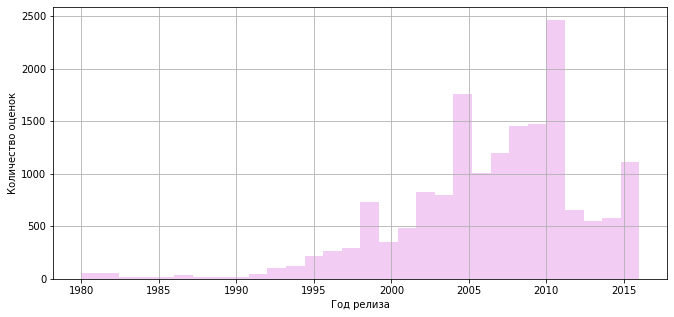

In [96]:
games['release_year'].plot(kind='hist', alpha=0.2, color='m',figsize=(11,5), bins=30)
plt.xlabel('Год релиза')
plt.ylabel('Количество оценок')
plt.grid()
plt.show()

На графике видно, что как раз с 1995 года начинается эра компьютерных игр (выходят первые игры знаменитых франшиз, такие как Need For Speed, Resident Evil, Fallout и GTA). Выход игровых консолей для тв, таких как PlayStation, Nintendo и Xbox и их активная конкуренция приводит к активному росту геймдевелопмента.

4 марта 2000 года выходит легендарная приставка PlayStation 2, 15 ноября 2001 года в ответ выходит XBox.

В мае 2007 года вышел первый iphone, что привело к активному развитию мобильных игр, что привело к спаду спроса на компьютерные и консольные игры, а рынок портативных консолей фактически умер, к 2018 году 49% от общей выручки в гейм индустрии имели именно мобильные игры. 

Посмотрим как менялись продажи по платформам. Выделим топ прибыльных платформ. 

In [41]:
top_20_platform_by_count = games\
.pivot_table(index='platform', values='total_sales', aggfunc='count')\
.sort_values(by='total_sales', ascending=False)\
.head(20)

Построим график с количесвом выпущенных игр по плотформам в зависимости от года выпуска и выделим те, на которых сохраняется выпуск игр.

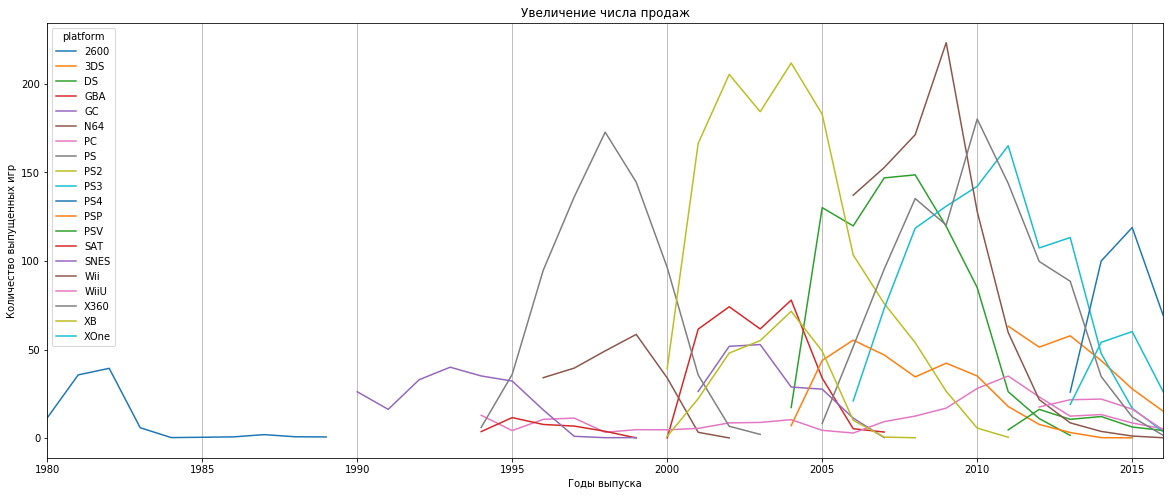

In [42]:
games\
.query('platform in @top_20_platform_by_count.index')\
.pivot_table(index='release_year', columns='platform', values='total_sales', aggfunc='sum')\
.plot(figsize=(20, 8))

plt.xlabel('Годы выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('Увеличение числа продаж')
plt.grid(axis='x')

plt.show()

В среднем платформы "живут" где-то 6-8 лет

Посмотрим более пристально на перисод с 2014, чтобы выделить "живые", на которых продолжают выпускать игры.

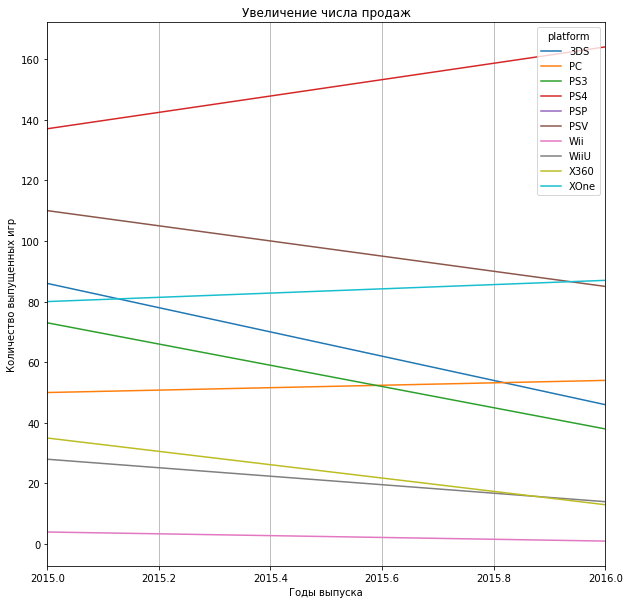

In [43]:
games\
.query('platform in @top_20_platform_by_count.index and release_year > 2014')\
.pivot_table(index='release_year', columns='platform', values='total_sales', aggfunc='count')\
.plot(figsize=(10, 10))
plt.xlabel('Годы выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('Увеличение числа продаж')
plt.grid(axis='x')
plt.show()

Определилось 8 "живых" платформ. При этом у 5 из них отмечается спад производста игр (Nintendo 3DS, Wii, WiiU, PlayStation 3 и V и Xbox360), а у 3 наоборот - подъем выпуска игр (PC, PlayStation 4 и Xbox One).

In [44]:
actual_platforms = ['3DS', 'Wii', 'WiiU', 'PS3', 'PS4', 'X360', 'XOne', 'PC', 'PSV']

Теперь оценим суммарную прибыль по платформам, для этого выделим топ 10 платформ по суммарной прибыли:

In [45]:
top_10_profit_platform = \
games.pivot_table(index='platform',values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)\
.head(10)

Построим график, выделив те платформы, на которых все еще выпускаются игры на 2015-2016 гг. 

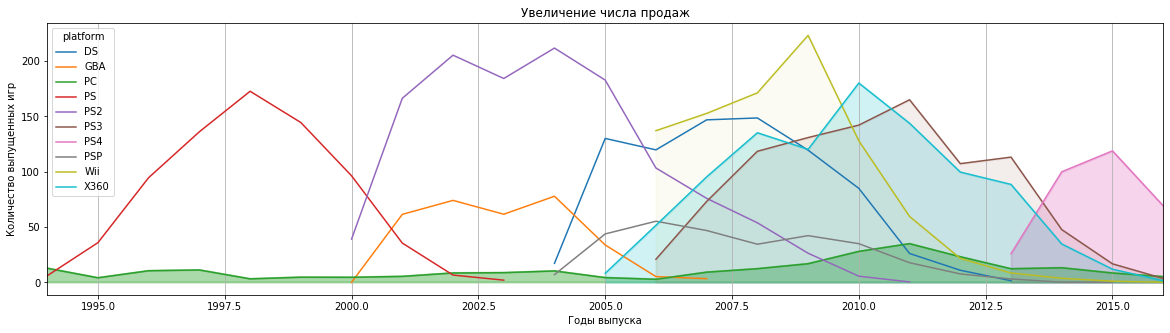

In [46]:
games_sales_pivot = games.query('platform in @top_10_profit_platform.index')\
.pivot_table(index='release_year', columns='platform', values='total_sales', aggfunc='sum')
games_sales_pivot.plot(figsize=(20, 5))
plt.xlabel('Годы выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('Увеличение числа продаж')
plt.grid(axis='x')
plt.xlim(1994, 2016)

x = games_sales_pivot.index.values.tolist()
y0 = games_sales_pivot['PS4'].values.tolist()
y1 = games_sales_pivot['PC'].values.tolist()
y2 = games_sales_pivot['PS3'].values.tolist()
y3 = games_sales_pivot['X360'].values.tolist()
y4 = games_sales_pivot['Wii'].values.tolist()

plt.fill_between(x, y1=y0, y2=0,alpha=0.3, color='tab:pink', linewidth=2)
plt.fill_between(x, y1=y1, y2=0, alpha=0.4, color='tab:green', linewidth=2)
plt.fill_between(x, y1=y2, y2=0, alpha=0.1, color='tab:brown', linewidth=2)
plt.fill_between(x, y1=y3, y2=0, alpha=0.2, color='tab:cyan', linewidth=2)
plt.fill_between(x, y1=y4, y2=0, alpha=0.05, color='tab:olive', linewidth=2)

plt.show()

И более детально оценим конец 2015 - начало 2016 гг. 

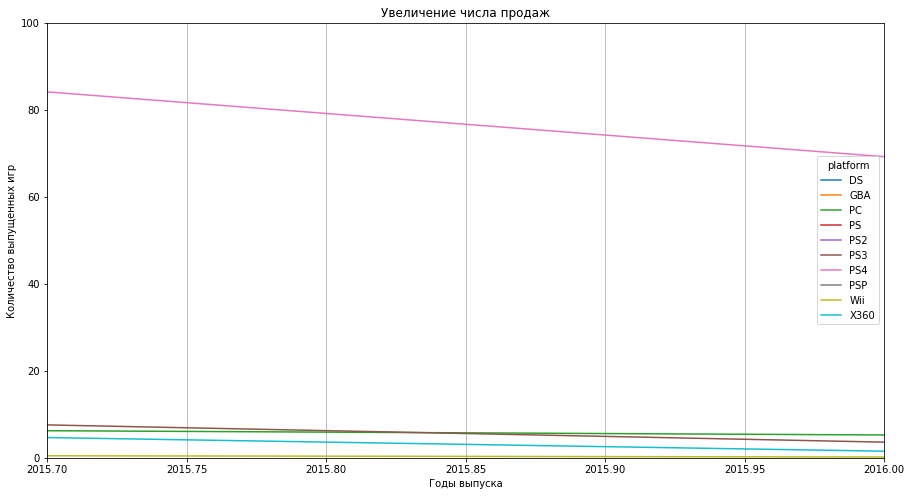

In [98]:
games_sales_pivot = games.query('platform in @top_10_profit_platform.index')\
.pivot_table(index='release_year', columns='platform', values='total_sales', aggfunc='sum')
games_sales_pivot.plot(figsize=(15, 8))
plt.xlabel('Годы выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('Увеличение числа продаж')
plt.grid(axis='x')
plt.xlim(2015.7, 2016)
plt.ylim(0, 100)

plt.show()

В первом графике площадь под кривой расскрашена у тех платформ, выпуск игр которых продолжается к началу 2016 года.

+ в конце 2007 года максимальная суммарная при быль была у Nintendo DS, в конце 2008 года лидером стал Nintendo Wii, однако в 2010 году после появления того как PS и Xbox догнала, а потом и обогнала Nintendo японская компания так и не смогла повторить свой успех  
+ помимо того, что увеличивается количество игр на PC и PlayStation 4, мы видим увеличение суммарных продаж к началу 2016 года
+ к началу 2016 года по суммарной прибыли на первом месте находилась PlayStation 4, далее значения раполагаются очень близко друг к другу - в порядке убывания PC, PlayStation 3, Xbox 360 и Nintendo Wii. 

Выберем актуальный период в 10 лет: с 2006 года (время актвиной конкуренции Xbox, Nintendo и PlayStation), сделаем сред, соотвестсвующий данному периоду:

In [48]:
games_act = games.query('release_year >= 2005').reset_index(drop=True) #act - actual

Изучим данные с продажами в актулаьных данных:

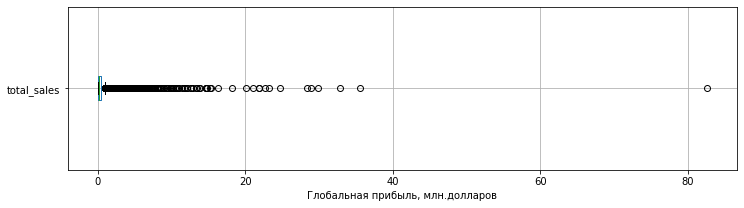

In [49]:
games_act.boxplot('total_sales', vert=False, figsize=(12, 3))
plt.xlabel('Глобальная прибыль, млн.долларов')
plt.show()

Отмечается большое количество выбросов, для лучше визуализации распределения зададим лимит по оси х от 0 до 4 млн.долларов:

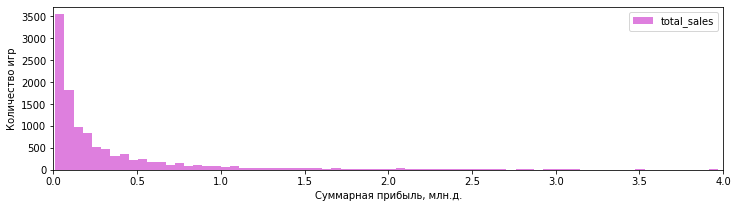

In [50]:
games_act.plot(y='total_sales', kind='hist', alpha=0.5, color='m', bins=1500, figsize=(12, 3))
plt.xlabel('Суммарная прибыль, млн.д.')
plt.ylabel('Количество игр')
plt.xlim(0, 4)
plt.show()

In [51]:
games_act['total_sales'].describe()

count    11465.000000
mean         0.481896
std          1.542377
min          0.010000
25%          0.050000
50%          0.140000
75%          0.410000
max         82.540000
Name: total_sales, dtype: float64

В столбы с глобальной прибылью набор данных скошено вправо, за счет выбросов среднее значение тяготеет к большим величинам (среднее - 0,48 млн.д., медиана - 0,14 млн.д.), при этом мы имеем большой разброс данных (стандартное отклонение ±1,54 млн.д.), поэтому для сравнения лучше использовать медиану, а не среднее значение, так как медиана менее чувствительна к выбросам. 

Оценим выбросы, для этого посмотрим игры, чья глобальня прибыль привысила 20 млн.долларов и оценим реалистичность данных:

In [52]:
games_act.query('total_sales > 20').sort_values(by='total_sales', ascending=False)

,name,platform,release_year,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating_ESRB,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
5,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
6,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,70,7.5,unknown,24.67
7,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91,8.6,E,23.21
8,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E,22.70
9,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82


+ Игра Wii Sports,  Wii Sports Resort шли в комплекте с приставкой и скорее всего эти копии, также идут в счет прибыли, чем можно объяснить высокие продажи 
+ Mario Kart Wii достаточно популярная игра, при этом она включена в книгу 1001 Video Games You Must Play Before You Die 
+ GTA - одна из культовых игр, а GTA V получила множество наград, неоднократно становилась игрой года, возможно дополнительным подспорьем стало появление онлайн версии

Возможно стоит убрть игру Wii Sports из анализа (самый большой выброс), так как ее цена возможно некорректна.

In [53]:
games_act = games_act.query('total_sales <80')

Сравним распределения данных и медиану глобальных продаж по платформам (выбрав платформы из списка актуальных платформ) и по всем играм в целом, построив графики boxplot, ограничив ось х от 0 до 4, чтобы визульно оценить положение медианы и 25 и 75 процентилей:

(0, 2)

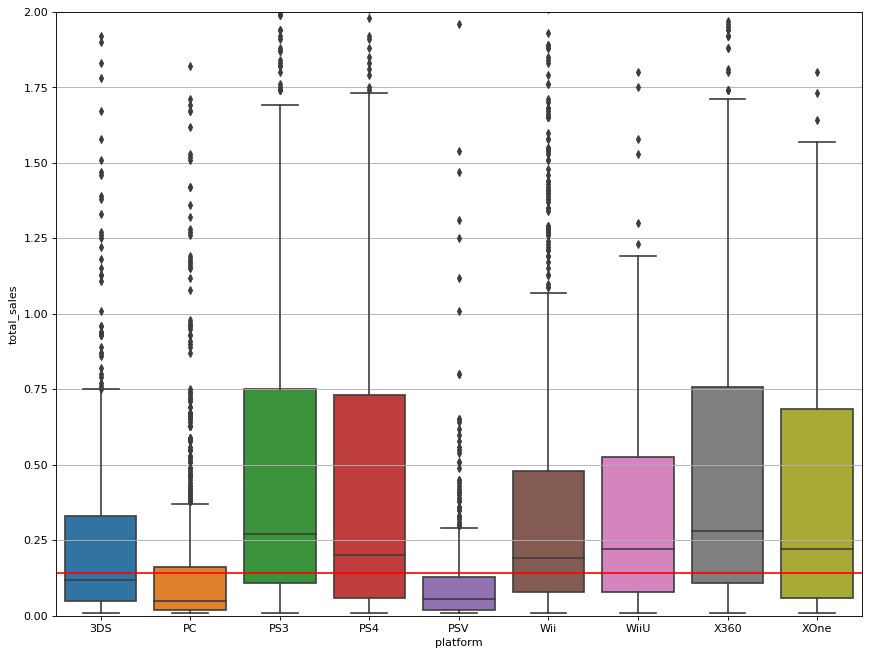

In [54]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x="platform", y="total_sales", \
            data=games_act.query('platform in @actual_platforms').sort_values(by='platform'))
plt.grid(axis='y')
plt.axhline(y=0.14, color='r', linestyle='solid')
plt.ylim(0, 2)

Красной линией указана общая медиана продаж. 

Выше общей медианы продаж имеют платформы:
+ PlayStation 3, 4 
+ Nintendo Wii и WiiU
+ Xbox 360 и Xbox One

Ниже общей медианы продаж имеют платформы:
+ PC 
+ Nintendo 3DS
+ PSV 

_____
#### Вывод

При анализе прибыли были выделены топ 10 платформ, которые отражают основные платформы для видеоигры на рынке:
+ консоли для ТВ, основные конкуренты на рынке - PlayStation, Xbox и Nintendo
+ PC 
+ портативные игровые консоли  PSP и Nintendo 3DS
_____
Что можно сказать на основании данных по каждой платформе:
+ Xbox360 и PlayStation 3 оказались самые прибыльными платформами по медиане продаж
+ PC платформа стабильно плетется в хвосте
+ портативные игровые консоли чуть более прибыльные, чем PC, но они недогоняют консоли для ТВ

#### - Есть ли зависимость между платформой, глобальными продажами и отзывами?

Напишем функцию, которая будет строить гарфик и считать коэффициент корреляции для актуальных платформ:

In [55]:
def show_corr_by_groups(df, checklist, column_group_from, column_corr_x, column_cor_y):
    """
    Функция для построения графика и рассчета коэффиуиента корреляции по группам, где в аргументе 
    указывается:
    df - DataFrame
    checklist - список значений, по которым формируются группы
    column_group_from = столбец в DataFrame, из которого выбирются группы
    column_corr_x и column_cor_y - столбцы с данными, между которыми оценивают корреляцию
    """
    for element in checklist:
        df_grouped = df[df[column_group_from] == element]
        plot = df_grouped.plot(x=column_corr_x, y=column_cor_y, kind='scatter', color='m', alpha=0.2)
        plt.title(element)
        plt.show()
        print('{:.2f}'.format(df_grouped[column_corr_x].corr(df_grouped[column_cor_y])))

Построим график и посчитаем коэффициент корреляции между прибылью и оценками критиков для этмх платформам:  

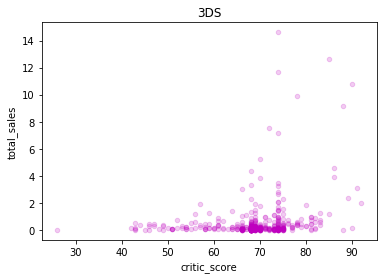

0.24


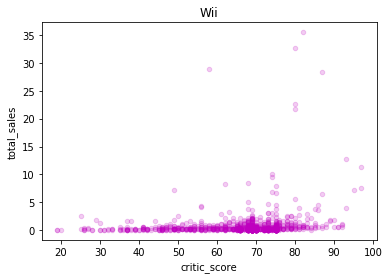

0.14


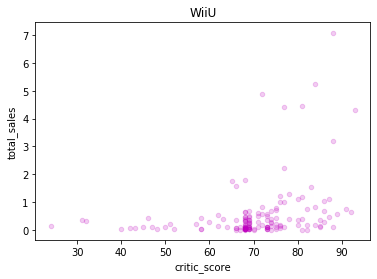

0.32


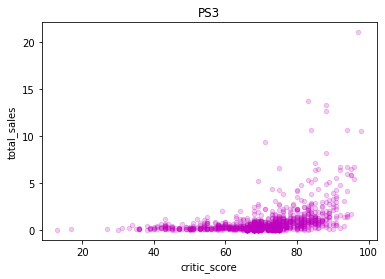

0.40


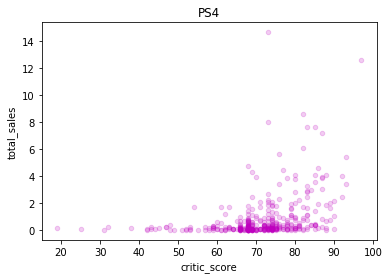

0.35


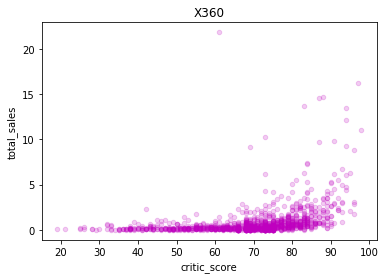

0.36


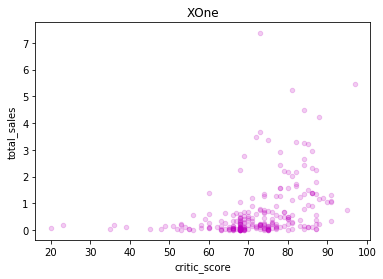

0.38


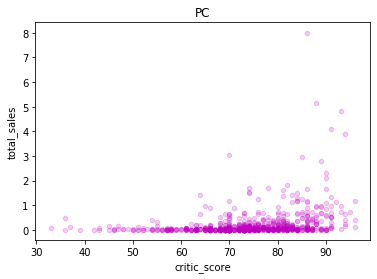

0.29


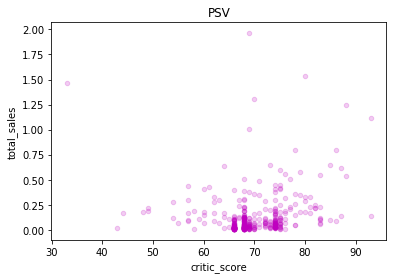

0.17


In [56]:
show_corr_by_groups(games_act, actual_platforms, 'platform', 'critic_score', 'total_sales')

Оценка силы корреляционной связи между продажами и оценками критиков на разных платформах:
+ слабой корреляционной связью (r<0,3) обладают платфорсы PC, GameBoy, PSP, Nintendo Wii, Nintendo DS
+ умеренной (0,3<r<0,5) - PlayStation, PlayStation 2, PlayStation 3, PlayStation 4, Xbox360

Интересно, что изменение продаж больше связано с рейтингом критиков на  PS и Xbox. 

Построим график и посчитаем коэффициент корреляции между прибылью и оценками игроков по топ 10 платформам:  

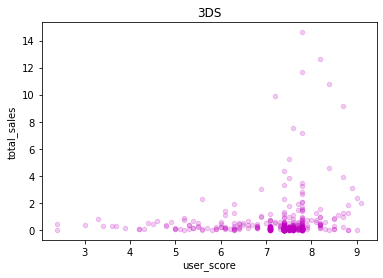

0.13


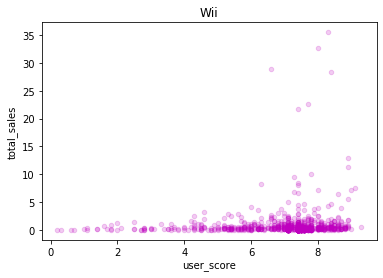

0.07


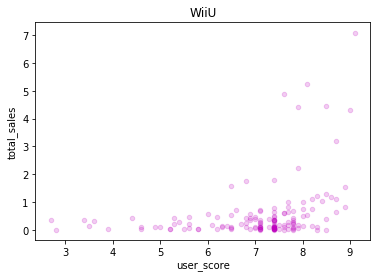

0.33


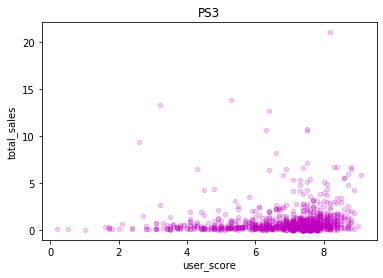

0.05


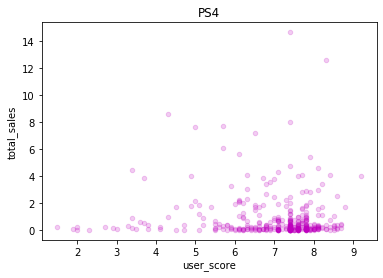

-0.07


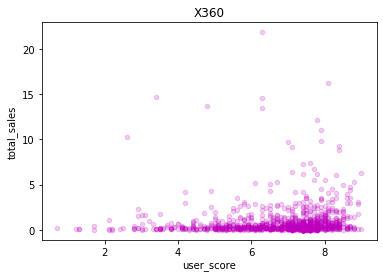

0.06


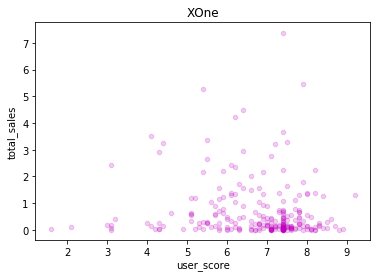

-0.11


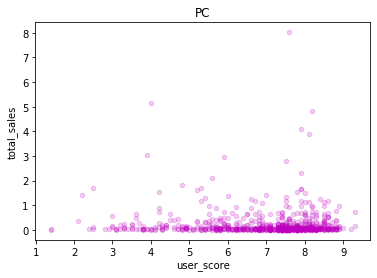

-0.05


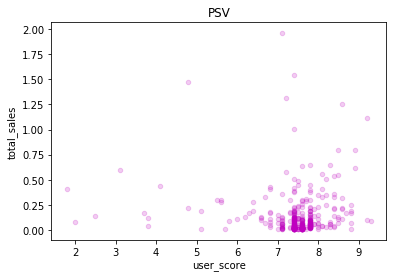

-0.04


In [57]:
show_corr_by_groups(games_act, actual_platforms, 'platform', 'user_score', 'total_sales')

Оценка силы корреляционной связи между продажами и оценками пользователей на разных платформах:
+ слабой корреляционной связью (r<0,3) обладают платформы PlayStation, PlayStation 2, PlayStation 3, PlayStation 4, Nintendo DS, Nintendo Wii, Xbox360, PSP, GameBoy, а PC имеет 0 коэффициент корреляции 

#### Выводы
По рузультатам исследования была выявлена слабая корреляционная связь между отзывами пользователей и продажами.
При этом умеренной корреляционной связью между отзывами критиков и продажами обладали PlayStation, PlayStation 2, PlayStation 3, PlayStation 4 и Xbox360, остальные платформы имели слабую корреляционную связь между этими параметрами.

Возможно, пользователи PS и Xbox больше обращают вниманием на оценку критиков или данные компании выделяют больше бюджета на рекламу в журналах, обзорах и на выставках, где зачастую критики оценивают игры. 

#### - Есть ли зависимость между жанром игры и глобальными продажами?

Построим график с медианой продаж и количеством выпущенных игр по жанрам:

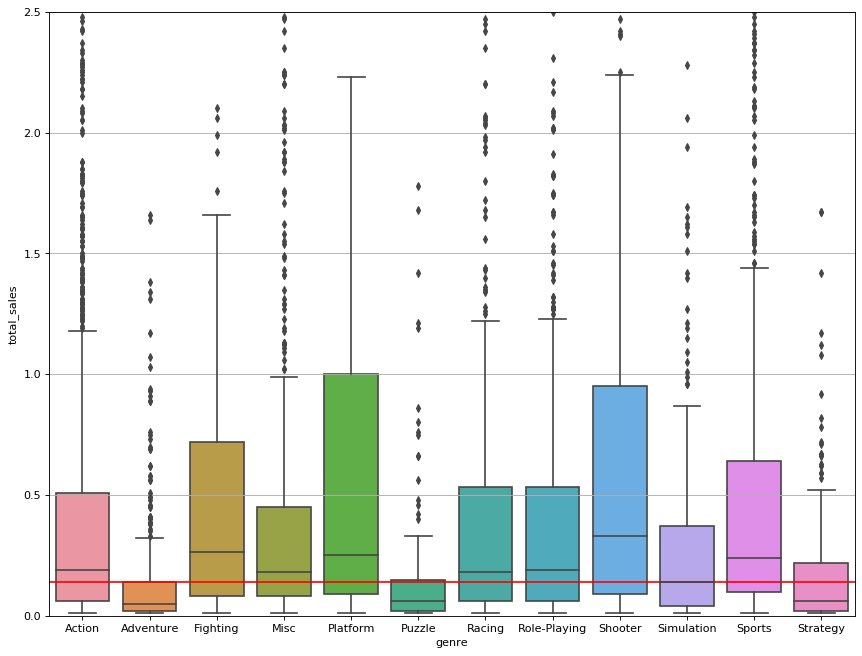

In [58]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x="genre", y="total_sales", \
            data=games_act.query('platform in @actual_platforms').sort_values(by='genre'))
plt.grid(axis='y')
plt.axhline(y=0.14, color='r', linestyle='solid')
plt.ylim(0, 2.5)
plt.show()

Ниже средней медианы продаж медиану имеют жанры:
+ Adventure
+ Puzzle 
+ Strategy
Остальные оказались выше среднего.

Топ 3 жанров по продажам (по медиане):
+ Shooter
+ Platform
+ Fighting

Если посмотреть суммарные продажи за исследуемы промежуток времени по жанрам:

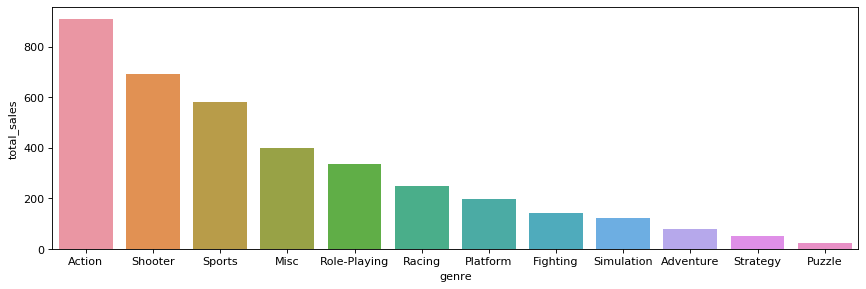

In [59]:
games_act_pivot = games_act.query('platform in @actual_platforms')\
            .pivot_table(index='genre', values='total_sales', aggfunc='sum')\
            .sort_values(by='total_sales', ascending=False)\
            .reset_index()

plt.figure(figsize=(13,4), dpi= 80)
sns.barplot(x="genre", y="total_sales", data=games_act_pivot)
plt.show()

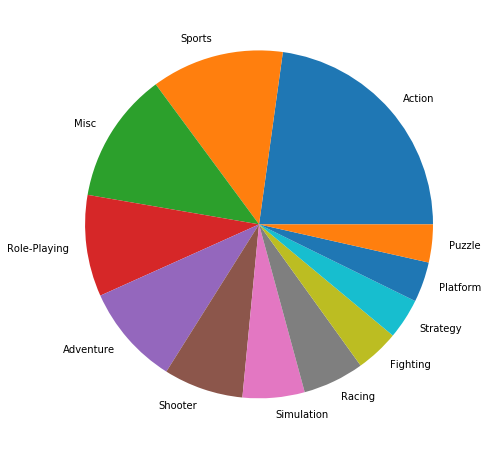

In [60]:
games_act.pivot_table(index='genre', values='total_sales', aggfunc='count')\
         .sort_values(by='total_sales', ascending=False)\
         .plot(kind='pie', subplots=True, figsize=(8, 8), legend=False)
plt.ylabel("")
plt.show()

Максимальную прибыль принесли Action, Shooter и Sports. 
При этом самое большое количество игр выходят в жанре Action, Sport и Misc. 

Построим графики cуммой продаж по жанрам по каждой из "живых" платформ. Для этого создадим сводную таблицу с рассчетами и создадим функцию, чтобы на основании этой таблицы построить графики:

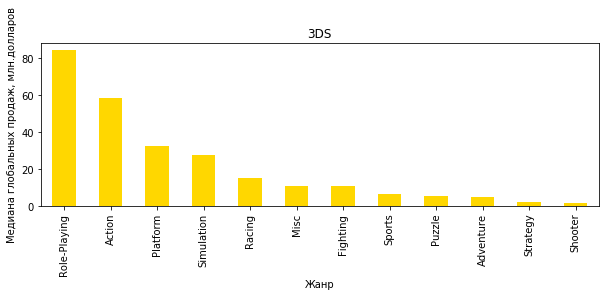

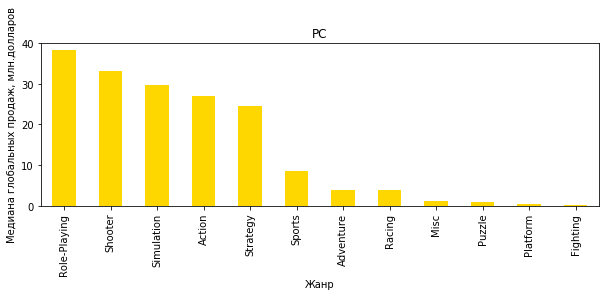

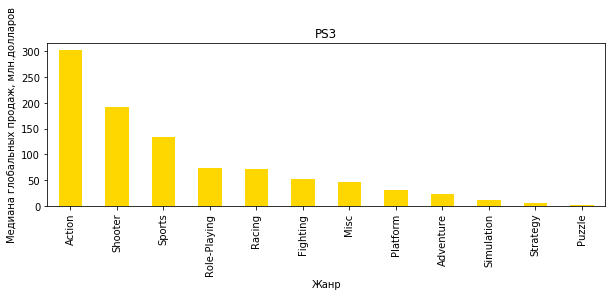

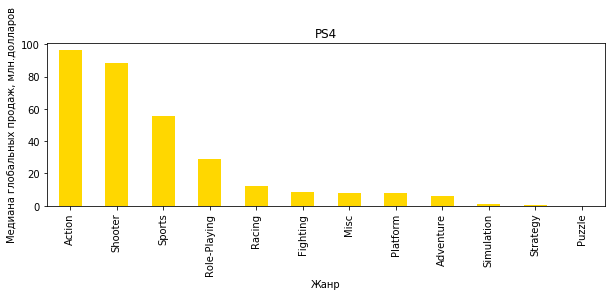

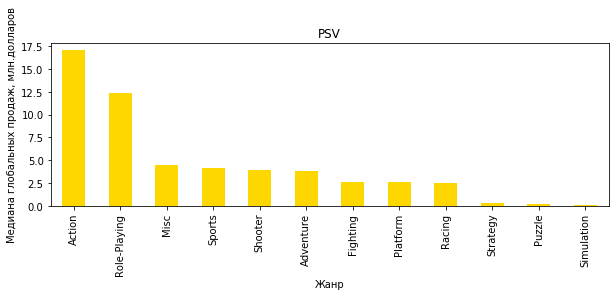

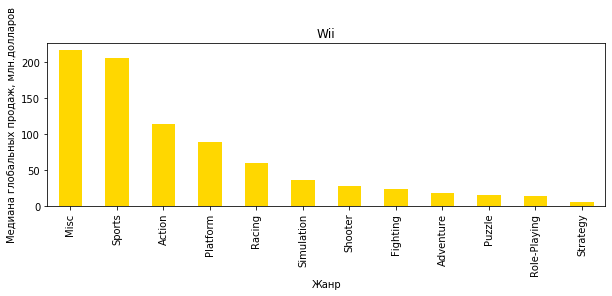

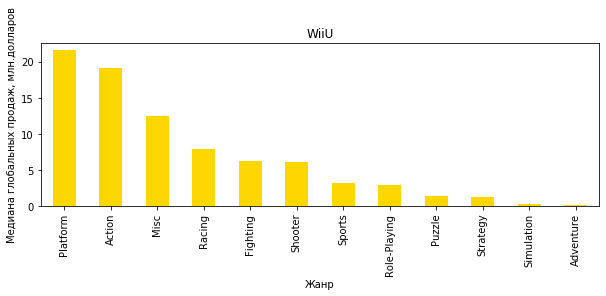

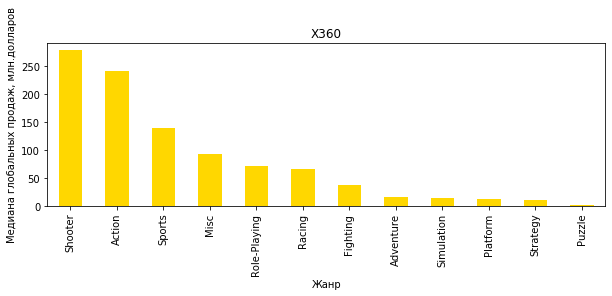

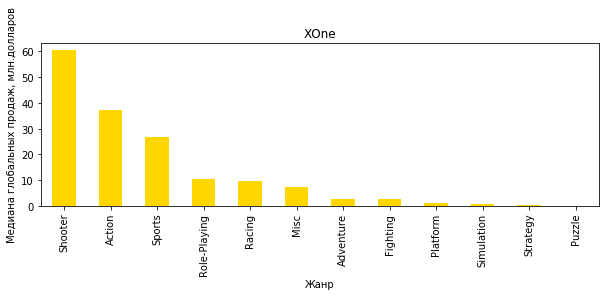

In [61]:
actual_platform_pivot = games_act.query('platform in @actual_platforms')\
.pivot_table(index='platform', columns='genre', values='total_sales', aggfunc='sum')

for index, row in actual_platform_pivot.iterrows():
    row.sort_values(ascending=False)\
    .plot(kind='bar', color='gold', figsize=(10, 3),title=index)
    plt.xlabel('Жанр')
    plt.ylabel('Медиана глобальных продаж, млн.долларов')
    plt.show()

Топ 3 жанра по консолям:

***Консоли***

Для Plaqysation 3 и 4:
+ Action
+ Shooter
+ Sports

Для Xbox:
+ Shooter
+ Action
+ Sports

Для Nintendo Wii:
+ Misc
+ Sports
+ Action

Для Nintendo WiiU:
+ Platform
+ Action
+ Misc

***PC***
+ RPG
+ Shooter
+ Simulation

***Портативные игровые консоли***

Для PSV:
+ RPG
+ Shooter
+ Platform

Для 3SD:
+ Action
+ RPG
+ Misc


#### Выводы

Шутеры почти на всех платформах входя в топ 3 по суммарным продажам и находятся на первом месте по общим суммарным продажам. 

Для платформ более прибыльные данры помимо шутеров - экшен и спорт, для PC и портативных консолей - РПГ. 

#### -Портрет пользователя каждого региона. 

Определим долю продаж у топ-5 самых популярных платформ для каждого из регионов NA, EU, JP. Для этого найдем общие продажи по каждому реигону:

In [62]:
games_act_sales = games_act[['platform', 'NA_sales','EU_sales', 'JP_sales']].set_index(['platform'])

In [63]:
total_sales_NA = games_act['NA_sales'].sum()
total_sales_EU = games_act['EU_sales'].sum()
total_sales_JP = games_act['JP_sales'].sum()

Выберем топ 5 платформ по каждому региону:

In [64]:
top_5_profit_platform_NA = games_act.pivot_table(index='platform', values='NA_sales', aggfunc='sum')\
         .sort_values(by='NA_sales', ascending=False)\
         .head(5)
top_5_profit_platform_EU = games_act.pivot_table(index='platform', values='EU_sales', aggfunc='sum')\
         .sort_values(by='EU_sales', ascending=False)\
         .head(5)
top_5_profit_platform_JP = games_act.pivot_table(index='platform', values='JP_sales', aggfunc='sum')\
         .sort_values(by='JP_sales', ascending=False)\
         .head(5)

In [65]:
top_5_platform_ratio_sales_NA = (top_5_profit_platform_NA / total_sales_NA).reset_index()
top_5_platform_ratio_sales_EU = (top_5_profit_platform_EU / total_sales_EU).reset_index()
top_5_platform_ratio_sales_JP = (top_5_profit_platform_JP / total_sales_JP).reset_index()

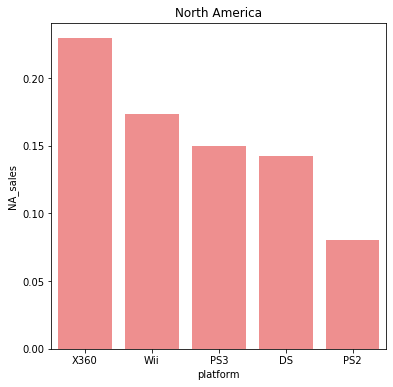

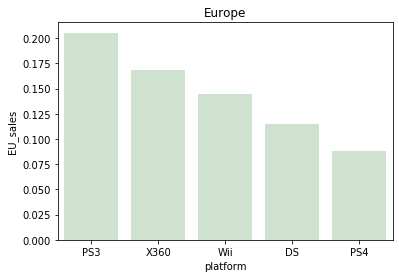

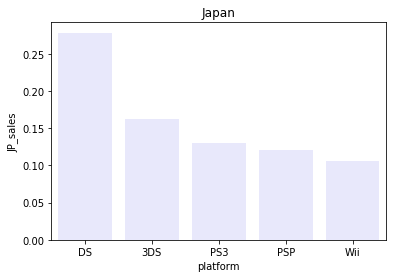

In [66]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x="platform", y="NA_sales", data=top_5_platform_ratio_sales_NA,
            color="r", alpha=0.5)
plt.title("North America")
plt.show()


sns.barplot(x="platform", y="EU_sales", data=top_5_platform_ratio_sales_EU,
            label="Europe", color="g", alpha=0.2)
plt.title("Europe")
plt.show()

sns.barplot(x="platform", y="JP_sales", data=top_5_platform_ratio_sales_JP,
            label="Japan", color="b", alpha=0.1)
plt.title("Japan")
plt.show()

В Северной Америке наибольшая доля продаж обладают Xbox и Wii, при этом PlayStation 4 не входит в топ 5, в Европейском решионе - PlayStation 3 и Xbox 360, в Японии - Nintendo DS и 3DS, при этом Xbox не входит в топ 5.  

Теперь оценим топ 5 для жанров:

In [67]:
top_5_profit_genre_NA = games_act.pivot_table(index='genre', values='NA_sales', aggfunc='sum')\
         .sort_values(by='NA_sales', ascending=False)\
         .head(5)
top_5_profit_genre_EU = games_act.pivot_table(index='genre', values='EU_sales', aggfunc='sum')\
         .sort_values(by='EU_sales', ascending=False)\
         .head(5)
top_5_profit_genre_JP = games_act.pivot_table(index='genre', values='JP_sales', aggfunc='sum')\
         .sort_values(by='JP_sales', ascending=False)\
         .head(5)

In [68]:
top_5_genre_ratio_sales_NA = (top_5_profit_genre_NA / total_sales_NA).reset_index()
top_5_genre_ratio_sales_EU = (top_5_profit_genre_EU / total_sales_EU).reset_index()
top_5_genre_ratio_sales_JP = (top_5_profit_genre_JP / total_sales_JP).reset_index()

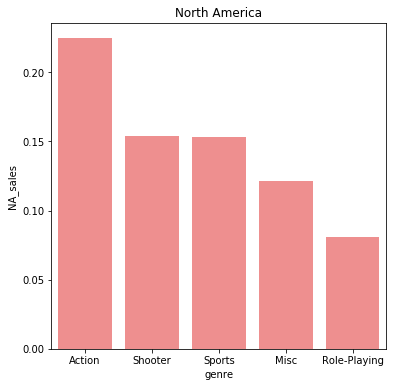

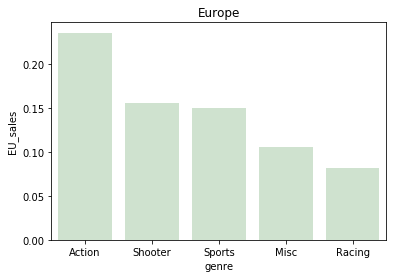

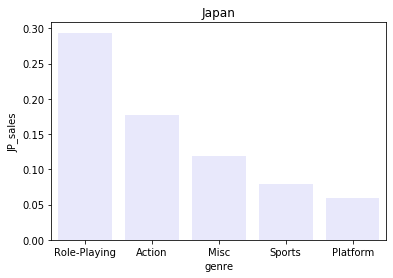

In [69]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x="genre", y="NA_sales", data=top_5_genre_ratio_sales_NA,
            color="r", alpha=0.5)
plt.title("North America")
plt.show()


sns.barplot(x="genre", y="EU_sales", data=top_5_genre_ratio_sales_EU,
            label="Europe", color="g", alpha=0.2)
plt.title("Europe")
plt.show()

sns.barplot(x="genre", y="JP_sales", data=top_5_genre_ratio_sales_JP,
            label="Japan", color="b", alpha=0.1)
plt.title("Japan")
plt.show()

Для Северной Америке и Европейского региона доля прадаж выше у экшенов, шутеров и спорта, а вот для Японии - РПГ.

Оценим теперь рейтинг ESRB.

In [70]:
games_act.head()

,name,platform,release_year,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating_ESRB,total_sales
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
5,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32


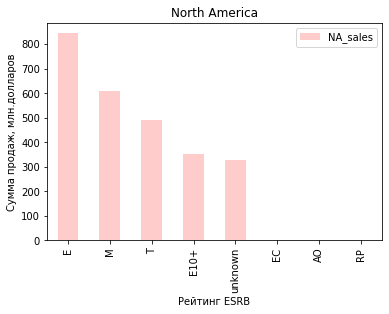

In [71]:
games_act\
.pivot_table(index='rating_ESRB', values='NA_sales', aggfunc='sum')\
.sort_values(by='NA_sales', ascending=False)\
.plot(kind='bar', color='r', alpha=0.2)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Сумма продаж, млн.долларов')
plt.title("North America")
plt.show()

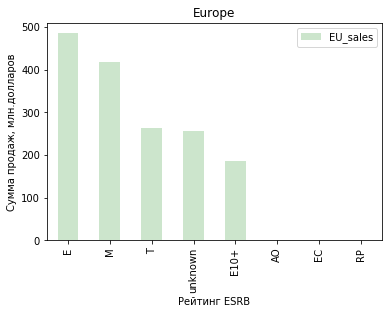

In [72]:
games_act\
.pivot_table(index='rating_ESRB', values='EU_sales', aggfunc='sum')\
.sort_values(by='EU_sales', ascending=False)\
.plot(kind='bar', color='g', alpha=0.2)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Сумма продаж, млн.долларов')
plt.title("Europe")
plt.show()

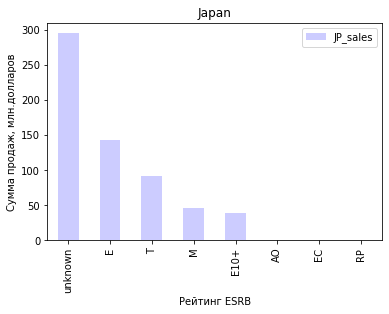

In [73]:
games_act\
.pivot_table(index='rating_ESRB', values='JP_sales', aggfunc='sum')\
.sort_values(by='JP_sales', ascending=False)\
.plot(kind='bar', color='b', alpha=0.2)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Сумма продаж, млн.долларов')
plt.title("Japan")
plt.show()

В Северо Американском регионе и Европейском регионе доля продаж выше у игр, которые имеют рейтинг E, M и T, при этом в Японии играют в игры, которые не оценивались по данной системе.

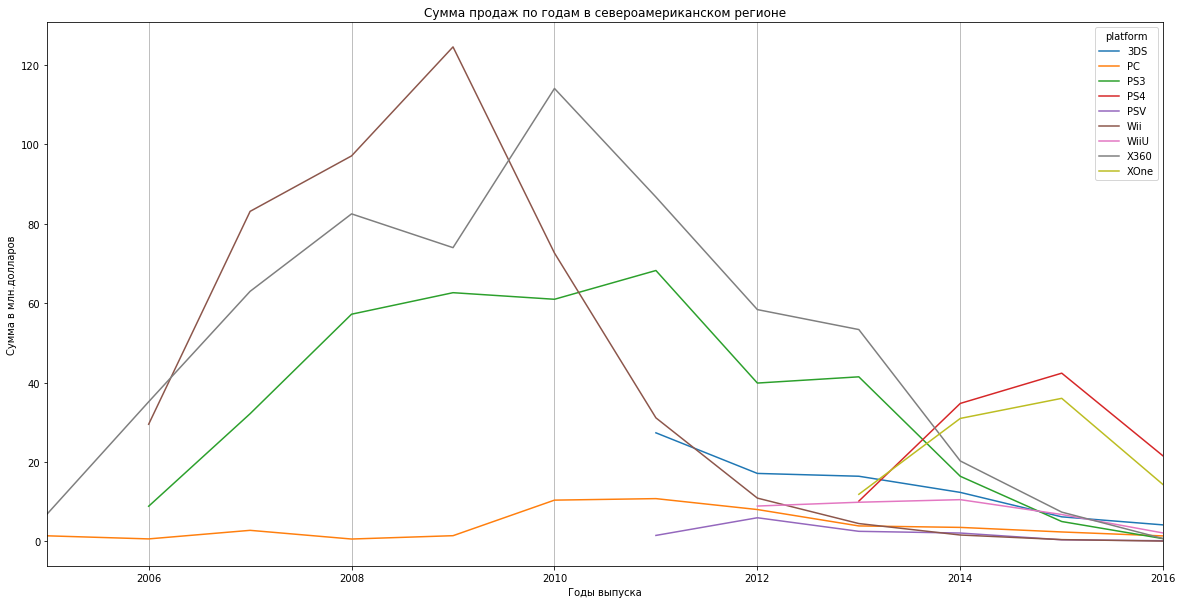

In [120]:
games_region_NA = games_act.query('platform in @actual_platforms')\
.pivot_table(index='release_year', columns='platform', values='NA_sales', aggfunc='sum')
games_region_NA.plot(figsize=(20, 10))
plt.xlabel('Годы выпуска')
plt.ylabel('Сумма в млн.долларов')
plt.title('Сумма продаж по годам в североамериканском регионе')
plt.grid(axis='x')
plt.xlim(2005, 2016)
plt.show()

С 2015 года в североамериканском регионе начался более активным спад PS4 и Xbox One, PC и Wii имеют стабильно низкий уровень.

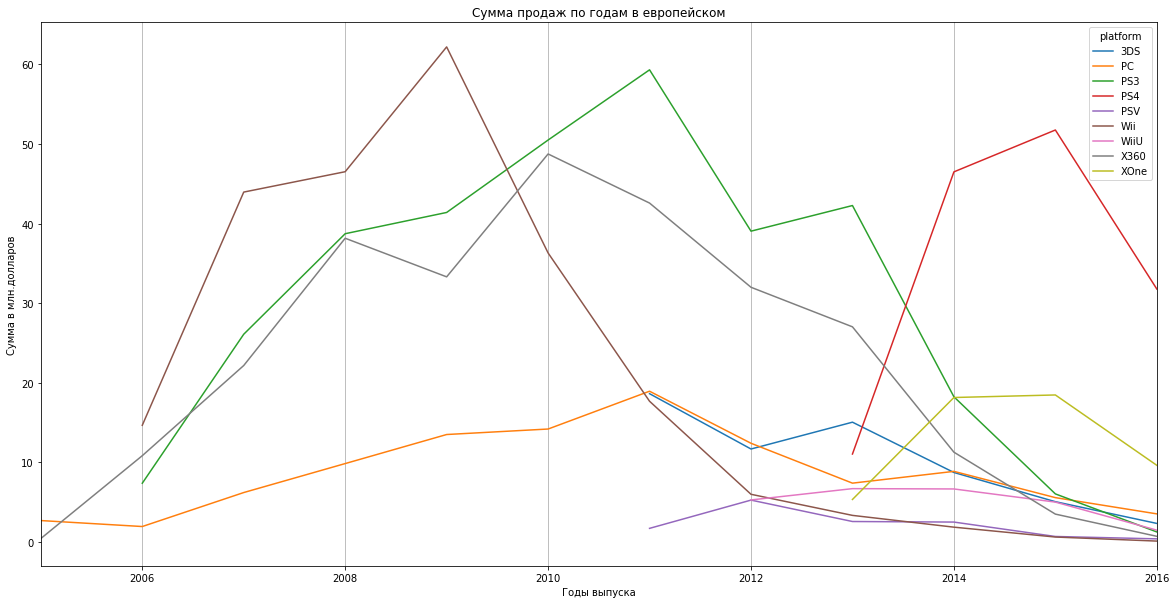

In [121]:
games_region_EU = games_act.query('platform in @actual_platforms')\
.pivot_table(index='release_year', columns='platform', values='EU_sales', aggfunc='sum')
games_region_EU.plot(figsize=(20, 10))
plt.xlabel('Годы выпуска')
plt.ylabel('Сумма в млн.долларов')
plt.title('Сумма продаж по годам в европейском')
plt.grid(axis='x')
plt.xlim(2005, 2016)
plt.show()

В европейском регионе так же сильный спад продаж PS4 и Xbox One и более плавный спад PC. 

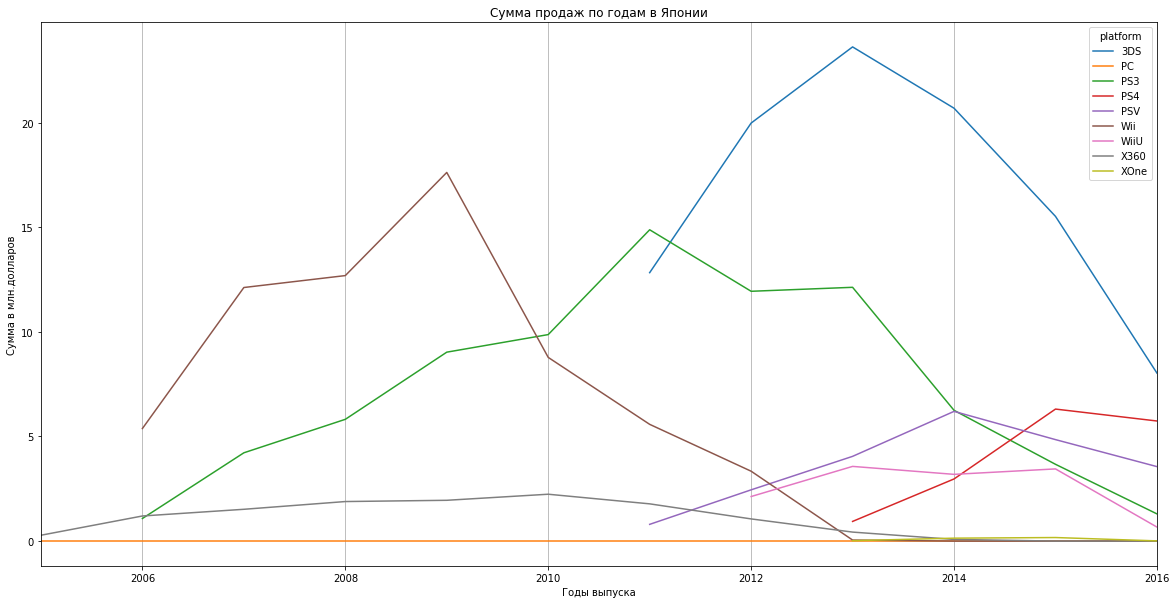

In [122]:
games_region_JP = games_act.query('platform in @actual_platforms')\
.pivot_table(index='release_year', columns='platform', values='JP_sales', aggfunc='sum')
games_region_JP.plot(figsize=(20, 10))
plt.xlabel('Годы выпуска')
plt.ylabel('Сумма в млн.долларов')
plt.title('Сумма продаж по годам в Японии')
plt.grid(axis='x')
plt.xlim(2005, 2016)
plt.show()

В Японии отмечается небольшой подъем продаж PS4, несмотря на общий спад. Достаточно сильный спад Nintendo 3DS. PC и Xbox One не слишком популярные платформы. 

#### Вывод

В результате исследования можно сделать следующие выводы:
+ Геймеры Североамериканского региона предпочитают Xbox360 и Nintendo Wii, наиболее популярные жанры экшн, шутеры и спорт, а популярные рейтингки E, M и T. С 2015 года в североамериканском регионе начался более активным спад PS4 и Xbox One, PC и Wii имеют стабильно низкий уровень.
+ Геймеры европейского региона предпочетают больше PlayStation 3 и Xbox 360, наиболее популярные жанры экшн, шутеры и спорт, а популяные рейименги такие же как и в североамериканском регионе - E, M и T. В европейском регионе так же сильный спад продаж PS4 и Xbox One и более плавный спад PC.
+ Геймеры Японии предпочетают портатвиные консоли Nintendo DS и 3DS, на 3ем месте PlayStation 3, а популярны жанры отличаются от Европы и Северной Америки. Японцы предпочетают РПГ, экшн и misc. Обращает на себя внимание, что большинство игр в Японии не имеет рейтинга ESRB, вероятно это связано с тем, что там используется рейтинг Computer Entertainment Rating Organization (CERO) - японской некомерческой организации. В Японии отмечается небольшой подъем продаж PS4, несмотря на общий спад. Достаточно сильный спад Nintendo 3DS. 

### Пользовательский рейтинг платформ Xbox One и PC

Однако визуально графики не различаются, по-видимому из-за распределения нельзя точно оценить среднее значение и нужно использовать другие критерии.

Теперь оценим рейтинг от пользователей. Сформулируем гипотезу:
+ Н0 - Срейдний рейтинг пользователей платформ Xbox One и PC НЕ различается
+ Н1 - Срейдний рейтинг пользователей платформ Xbox One и PC различается

In [74]:
PC_games = games_act.query('platform == "PC"')
XOne_games = games_act.query('platform == "XOne"')
PC_games_and_XOne_games = games_act.query('platform == "PC" or platform == "XOne"')

In [75]:
np.var(PC_games['user_score'])

1.8911331833357528

In [76]:
np.var(XOne_games['user_score'])

1.5664154469012772

In [77]:
alpha=0.05
result = st.ttest_ind(PC_games['user_score'],\
                      XOne_games['user_score'], equal_var=True)
if (result.pvalue < alpha) and (PC_games['user_score'].mean() > XOne_games['user_score'].mean()):
    print('опровергаем Н0, среднее значение рейтинга пользователей выше у PC игр (p={:.3f})'.format(result.pvalue))
elif (result.pvalue < alpha) and (PC_games['user_score'] < XOne_games['user_score'].mean()):
    print('опровергаем Н0, реднее значение рейтинга пользователей выше у игр на Xbox One (p={:.3f})'.format(result.pvalue))
else:
    print('не получается опровергнуть Н0, p={:.3f}'.format(result.pvalue))

опровергаем Н0, среднее значение рейтинга пользователей выше у PC игр (p=0.009)


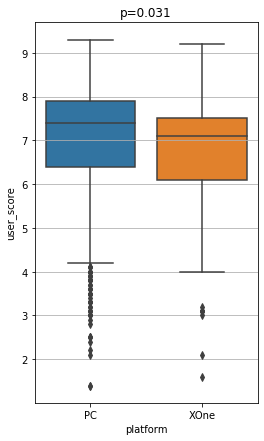

In [78]:
plt.figure(figsize=(4,7))
sns.boxplot(x="platform", y="user_score", data=PC_games_and_XOne_games)
plt.grid(axis='y')
plt.title('p=0.031')
plt.show()

In [92]:
data_platform=[
    ['PC', '7,02±1.38', 'p=0,009'],
    ['Xbox One', '6.76±1.25', '']]

columns_platform=['Платформа', 'Оценка пользователей, mean±SD', 'p']
pd.DataFrame(data=data_platform, columns=columns_platform).set_index('Платформа')

,"Оценка пользователей, mean±SD",p
Платформа,,
PC,"7,02±1.38","p=0,009"
Xbox One,6.76±1.25,


### Пользовательский рейтинг платформ Action и Sports

Сформулируем гипотезу:
+ Н0 - Срейдний рейтинг пользователей платформ Action и Sports НЕ различается
+ Н1 - Срейдний рейтинг пользователей платформ Action и Sports различается

In [80]:
action_games = games_act.query('genre == "Action"')
sports_games = games_act.query('genre == "Sports"')
action_games_and_sports_games = games_act.query('genre == "Action" or genre == "Sports"')

In [81]:
np.var(action_games['user_score'])

1.1144328740279825

In [82]:
np.var(sports_games['user_score'])

1.6341044772745883

In [83]:
alpha=0.05
result = st.ttest_ind(action_games['user_score'],\
                      sports_games['user_score'], equal_var=True)
if (result.pvalue < alpha) and (action_games['user_score'].mean() > sports_games['user_score'].mean()):
    print('опровергаем Н0, среднее значение рейтинга пользователей выше у экшн игр (p={:.3f})'.format(result.pvalue))
elif (result.pvalue < alpha) and (action_games['user_score'] < sports_games['user_score'].mean()):
    print('опровергаем Н0, реднее значение рейтинга пользователей выше у спортивных игр (p={:.3f})'.format(result.pvalue))
else:
    print('не получается опровергнуть Н0, p={:.3f}'.format(result.pvalue))

опровергаем Н0, среднее значение рейтинга пользователей выше у экшн игр (p=0.000)


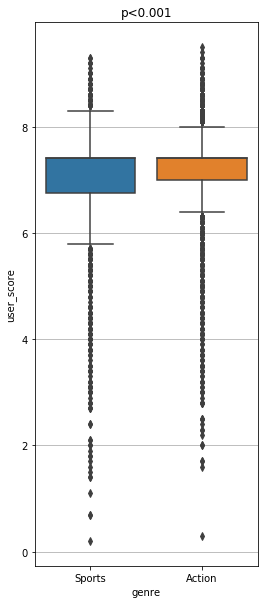

In [84]:
plt.figure(figsize=(4,10))
sns.boxplot(x="genre", y="user_score", data=action_games_and_sports_games)
plt.grid(axis='y')
plt.title('p<0.001')
plt.show()

In [95]:
data_platform=[
    ['Actiom', '7,14±1.05', '<0,001'],
    ['Sports', '6.93±1.28', '']]

columns_platform=['Жанр', 'Оценка пользователей, mean±SD', 'p']
pd.DataFrame(data=data_platform, columns=columns_platform).set_index('Жанр')

,"Оценка пользователей, mean±SD",p
Жанр,,
Actiom,"7,14±1.05","<0,001"
Sports,6.93±1.28,


### Выводы

Для анализе был выбран период с 2005 года, когда вышли PlayStation 3, Xbox 360 и Nintendo Wii и начался активный рост создания компьютерных игр. 

По полученным данным в целом по всем платформам к началу 2016 года отмечается спад продаж на всех известных платформах, вероятнее всего это связано с ростом популярность мобильных игр.

Несмотря на спад продаж, отмечается рост количества выпускаемых игр на PlayStation 4, Xbox One и PC.

К концу 2015 года топ по суммарной прибыли  по всем регионам выглядил следующим образом:
+ PlayStation 4
+ PC
+ PlayStation 3
+ Xbox 360
+ Nintendo Wii 

Но в целом продажи по всем платформам к 2016 году находятся на спаде. 

При исследовании корреляции отзывов критиков и пользователей с продажами по платформам, выпуск игр на которые продолжался в 2015 году, существенной связи выявлено не было. 

Самые топовые по прибыли (медиана) оказались Шутеры, Платформеры и Файтинги, самые непопулярные - Приключения, Пазлы и Стратегии. А вот по суммарной прибыли по всем годам выделились Экшн, Шутер и Спорт. 

Самый популярный жанр по консолям - Экшн, Спорт и Шутреы, для PC - РПГ, Шуторы и Симуляторы.

При сравнении регионов я составила следующие портреты пользователя: 
+ пользователь из ***североамериканского региона*** за 10 лет предпочетал играть на Xbox360 или Nintendo Wii, к началу 2015 года отмечается спад продаж по всем платформам, в том числе и PlayStation 4, вышедшая 2 годами ранее и Xbox one, вышедшая годом ранее, т.е. интерес к консолям падает. Любимые жанры пользователя Экшн и Шутеры (популярные жанры по консолям). Пользователи больше выбирают игры с определенными рейтингом ESRB
+ пользователь из ***европейского региона*** за 10 лет предпочетал играть на PlayStation 3 и Xbox360, к началу 2015 года отмечается спад продаж по всем платформам, т.е. интерес к консолям как и в североамериканском регионе падает. Любимые жанры пользователя Экшн и Шутеры (популярные жанры по консолям). Пользователи больше выбирают игры с определенными рейтингом ESRB. В целом пользователь из европейского региона похож на пользователя из североамериканского региона
+ пользователь из ***Японии*** за 10 лет предпочетал играть в Nintendo DS и 3DS (подерживает отечественного производителя) и немного в PlayStation 3, к началу 2015 года отмечается спад продаж по всем платформам, однако, PlayStation 4 имеет не такой сильный спад (можно сказать, что плато), чем в других регионах. Любимые жанры пользователя РПГ и Экшн (популярные жанры для портативных консолей). Пользователи больше выбирают игры с НЕ определенными рейтингом ESRB. Вероятно это связано с тем, что там используется рейтинг Computer Entertainment Rating Organization (CERO) - японской некомерческой организации. 

При сравнении средних оценок от пользователей у игр на PC и Xbox One, у PC игр средний рейтинг выше(7,02±1.38 vs 6.76±1.25, p=0,009). При сравнении средних оценок от пользователей у Экшн игр и игр в жанре Спорт, у Экшн игр средний рейтинг выше(7,14±1.05 vs 6.93±1.28	, p<0,001).

При анализе обращало на себя внимание, что переломным моментом для консолей стал 2015 год, по-видимому произошло какое-то событие в технической и гейминдустрии, что привело к изменению на рынке. 